# Create Dataset from fetched data

In [1]:
import json

with open('./dataset/dict.json') as f:
    lyrics_documents = json.load(f)

len(lyrics_documents)

10

## check the range of lyrics length

In [2]:
min_lyrics_len = 1e9
max_lyrics_len = 0
lyrics_lengths = []
for doc in lyrics_documents:
    for index,lyrics in doc.items():
        if(index == "ARTIST_NAME"):
            continue
        len_lyrics = len(lyrics)
        lyrics_lengths.append(len_lyrics)

        min_lyrics_len = min(min_lyrics_len, len_lyrics)
        max_lyrics_len = max(max_lyrics_len, len_lyrics)

print(f"{min_lyrics_len=}")
print(f"{max_lyrics_len=}")

min_lyrics_len=0
max_lyrics_len=13091


(array([ 51.,  52.,  28.,  20.,  36.,  36.,  43.,  46.,  69.,  75.,  92.,
        109., 132., 111., 115., 107., 107.,  89.,  76.,  67.,  40.,  39.,
         34.,  29.,  25.,  16.,  23.,  19.,  25.,  12.,  20.,  11.,  18.,
         13.,   9.,  14.,  14.,   8.,   6.,  10.,  12.,   4.,   5.,   5.,
          3.,   1.,   1.,   3.,   5.,   2.,   1.,   2.,   0.,   1.,   1.,
          0.,   3.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([    0.  ,   130.91,   261.82,   392.73,   523.64,   654.55,
          785.46,   916.37,  1047.28,  1178.19,  1309.1 ,  1440.01,
         1570.92,  1701.83,  1832.74,  1963.65,  2094.56,  2225.47,
         2356.38,  2487.29,  2618.2 ,  2749.11,  2880.02,  3010.93,
         3141.84,  3272.75,  3403.66,  3534.57

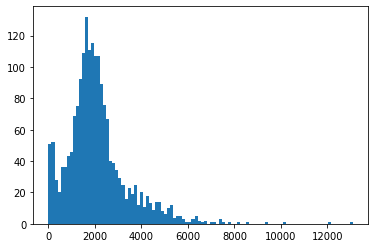

In [3]:
#print lyrics length distribution
import matplotlib.pyplot as plt
plt.hist([lyrics_lengths],bins=100)

## remove non-lyrics entry that is too long(>10000) manually, and that is too short(<300) automatically
300, 10000 is determined as by the figure above.

In [4]:
excluded_title= ["ARTIST_NAME"]
lower_threshold = 300
higher_threshold = 10000

In [5]:
too_long = {}
too_short = {}
min_lyrics_len = 1e9
max_lyrics_len = 0

for doc in lyrics_documents:
    for index,lyrics in doc.items():
        if(index == "ARTIST_NAME"):
            continue
        len_lyrics = len(lyrics)
        if(len_lyrics < lower_threshold):
            too_short[index] = lyrics
            excluded_title.append(index)
            continue

        if(len_lyrics > higher_threshold):
            too_long[index] = lyrics
            continue

        min_lyrics_len = min(min_lyrics_len, len_lyrics)
        max_lyrics_len = max(max_lyrics_len, len_lyrics)
print(f"{min_lyrics_len=}")
print(f"{max_lyrics_len=}")

min_lyrics_len=300
max_lyrics_len=9410


In [6]:
for title, lyrics in too_long.items():
    print(f'{title=}\t')
    print(f'{len(lyrics)=}\n')
    print(f'---------lyrics---------\n{lyrics[:500]}\n')


title='XXXTENTACION’s Discography'	
len(lyrics)=10151

---------lyrics---------
XXXTENTACION’s Discography LyricsXXXTENTACION's discography is vast, ranging from 2013 to 2020. While it’s not perfect, we've decided to make a list of all of XXXTENTACION's songs. Feel free to edit / annotate a song to provide more detail.
More Information:
• When editing, check to make sure what you’re adding is proofed and isn't a remix (The track Tear Drop isn't an official song for example so adding it is redundant).ProjectsMarch 6, 2014 • XXX (UNMASTERED)
April 30, 2014 • XXX
May 11, 2014 

title='Eminem Freestyles on Tim Westwood | 2009'	
len(lyrics)=12143

---------lyrics---------
Eminem Freestyles on Tim Westwood | 2009 Lyrics
Yo blast me off, Tim
Where's that boom?
Blast me off, son
Pew, pew, pew- pew, pew!
The bombs, man!
Right now, we're doin' this for Beijing, baby, understand how it's goin' down
That's how he talk
Blastin' off right now, son!
Real big, real legendary up in the game
Yeah
Drippi

In [7]:
for title, lyrics in too_short.items():
    print(f'{title=}\t')
    print(f'{len(lyrics)=}\n')
    print(f'--------lyrics-----------\n{lyrics}\n')

title='\u200braindrops (an angel cried)'	
len(lyrics)=259

--------lyrics-----------
TranslationsEspañolРусскийRomânăPortuguêsItalianoHebrewDeutschFrançaisNederlandsDansk​raindrops (an angel cried) Lyrics
When raindrops fell down from the sky
The day you left me, an angel cried
Oh, she cried
An angel cried, she criedYou might also like63Embed

title='Intro (C&C)'	
len(lyrics)=287

--------lyrics-----------
TranslationsEspañolPortuguêsIntro (C&C) Lyrics
Welcome to this Christmas
Only comes one time a year, don't miss this
I just wanna welcome you to Christmas
Let me sneak into your speakers, listen
I'll be singing, "Oh, oh, oh, oh"
I'll be singing, "Oh, oh, oh, oh"You might also like6Embed

title='Sober'	
len(lyrics)=195

--------lyrics-----------
Sober LyricsSnippet
Sober, when you come closer
Boy I know I know you've been trying to quit
But you let it show

Boy we're kissing now
Baby when I'm with you
I'm wasted
You might also like2Embed

title='I’ve Heard It Both Ways'	
len(lyrics)=1

In [8]:
# This was too long and turned out to be non-lyrics, so removed manually
excluded_title.append("XXXTENTACION’s Discography")

In [9]:
labels, texts = [],[]

for doc in lyrics_documents:
    for title,text in doc.items():
        if(title in excluded_title):
            print(f'excluded= {title}')
            continue
        labels.append(doc["ARTIST_NAME"])
        texts.append(title + '\n' + text)


excluded= ARTIST_NAME
excluded= ​raindrops (an angel cried)
excluded= Intro (C&C)
excluded= Too Close
excluded= Sober
excluded= I’ve Heard It Both Ways
excluded= The Way It Is
excluded= ​started*
excluded= Honesty
excluded= ​not ok
excluded= Butterfly*
excluded= Female (Interlude)
excluded= Starshot
excluded= Sit It Upon It
excluded= His Lies (close friends)*
excluded= ARTIST_NAME
excluded= Cry
excluded= Vincent Price Excerpt From Thriller Voice-Over Session
excluded= ARTIST_NAME
excluded= Reputation Magazine Vol. 1
excluded= ARTIST_NAME
excluded= In The End
excluded= Introduction
excluded= Willy Wonka Was a Child Murderer
excluded= XXXTENTACION’s Discography
excluded= THE END IS NIGH
excluded= Ruff neck (snippet)
excluded= SELFLESS
excluded= RUN FORREST RUN!
excluded= Glimpse
excluded= Jah on drums
excluded= ???
excluded= NOBODYS (intro)
excluded= 666
excluded= Red Light District
excluded= ​glass house
excluded= The Edge
excluded= ARTIST_NAME
excluded= ARTIST_NAME
excluded= Chromatica

In [10]:
from collections import Counter
print(len(labels))
Counter(labels)

1784


Counter({'Ariana Grande': 186,
         'Michael Jackson': 198,
         'Taylor Swift': 199,
         'XXXTentacion': 184,
         'Eminem': 200,
         'Lady Gaga': 184,
         'Selena Gomez': 107,
         'Beyonce Knowles': 191,
         'Dua Lipa': 147,
         'Jennifer Lopez': 188})

(array([ 19.,  23.,  37.,  33.,  43.,  48.,  69.,  72.,  92., 106., 132.,
        105., 113.,  97., 109.,  89.,  76.,  66.,  44.,  35.,  42.,  30.,
         22.,  21.,  20.,  17.,  21.,  19.,  13.,  19.,  13.,  12.,  14.,
         12.,  18.,   8.,   6.,   8.,   9.,  10.,   3.,   7.,   3.,   2.,
          1.,   1.,   3.,   6.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,
          2.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  305.  ,   432.97,   560.94,   688.91,   816.88,   944.85,
         1072.82,  1200.79,  1328.76,  1456.73,  1584.7 ,  1712.67,
         1840.64,  1968.61,  2096.58,  2224.55,  2352.52,  2480.49,
         2608.46,  2736.43,  2864.4 ,  2992.37,  3120.34,  3248.31,
         3376.28,  3504.25,  3632.22,  3760.19

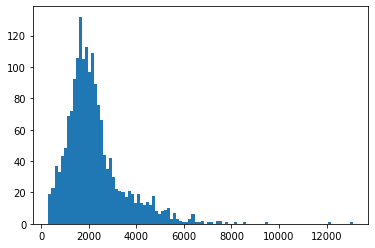

In [11]:
# plt.hist([l for l in lyrics_length if l < 10000 and l > 300],bins=80)
plt.hist([len(t) for t in texts],bins=100)

In [16]:
for i in range(3):
    print(f'{labels[i]},{texts[i][:200]}')

Ariana Grande,​thank u, next
TranslationsTürkçeSvenskaEspañolРусскийPortuguêsPolski한국어DeutschFrançaisNederlands​thank u, next Lyrics
Thought I'd end up with Sean
But he wasn't a match
Wrote some songs about Ricky
N
Ariana Grande,7 rings
TranslationsTürkçeEspañolRomânăPortuguêsPolskiItalianoHebrewΕλληνικάDeutschFrançaisNederlandsDansk7 rings Lyrics
Yeah, breakfast at Tiffany's and bottles of bubbles
Girls with tattoos who like
Ariana Grande,​God is a woman
TranslationsУкраїнськаTürkçeEspañolРусскийPortuguêsItalianoHebrewDeutschFrançaisNederlands​God is a woman Lyrics
You, you love it how I move you
You love it how I touch you, my one
Whe


## split data into training, validation, test set

In [17]:
from sklearn.model_selection import train_test_split
texts_train_val, texts_test, labels_train_val, labels_test = train_test_split(
    texts, labels, test_size=0.20, random_state=42)

texts_train, texts_val, labels_train, labels_val = train_test_split(
    texts_train_val, labels_train_val, test_size=0.25, random_state=42)

In [18]:
# check the ratio of each set
total = len(texts_train) + len(texts_val) + len(texts_test)
len(texts_train)/total, len(texts_val)/total, len(texts_test)/total

(0.5997757847533632, 0.20011210762331838, 0.20011210762331838)

### Provide a table with the label counts for each split of the dataset

In [49]:
import pandas as pd
pd.DataFrame([dict(Counter(labels_train)),
              dict(Counter(labels_val)),
              dict(Counter(labels_test))],index=["train","validation","test"])

,Lady Gaga,Ariana Grande,Eminem,Selena Gomez,Jennifer Lopez,XXXTentacion,Beyonce Knowles,Michael Jackson,Taylor Swift,Dua Lipa
train,112,117,136,57,103,112,113,119,118,83
validation,42,39,30,25,45,35,41,33,39,28
test,30,30,34,25,40,37,37,46,42,36


# ここから下はゴミ

In [ ]:
from lyricsgenius import Genius
token = '02BnaBIRnqGhVSFhC2ZXAlL5LWl79xEtVhw9qJS4j1Nii8p9ZSO3JbcEwfQYZSry'
import json

In [ ]:
excluded_terms = ["remix","Acoustic","Instrumental","speech","Commentary","Spotify","version"]
artist_names = ["Michael Jackson","Elvis Presley", "Queen", "Aretha Franklin",
"Elton John", "The Beatles", "Whitney Housten","Frank Sinatra","David Bowie"]

genius = Genius(access_token=token, timeout=100, remove_section_headers=True,
 skip_non_songs=True,retries=10, excluded_terms=excluded_terms)

for singer in artist_names:
    artist = genius.search_artist(singer,sort="popularity", max_songs=200)
    artist.save_lyrics(f'./raw_jason/{singer}_artist_file.json')# save artist object as json file just in case

    songs_dict = {}
    for song in artist.songs:
        lyrics_plain_text = song.to_text()
        if(lyrics_plain_text != None):
            songs_dict[song.title] = lyrics_plain_text
    
    # save dictionary as json file, key = title, value = lyrics
    with open(f'./lyrics/{singer}.json',"w") as outfile:
        json.dump(songs_dict,outfile)





In [ ]:
import json
test_dict = {"t1":"hoge",
             "t2":"huga",
             "t3":"hogehoge"}
test_dict["t1"]
# json.dumps(test_dict)
# json.dump(test_dict,"w","testjson.json",indent=4)
with open("sample.json","w") as outfile:
    json.dump(test_dict,outfile)

In [ ]:
with open("sample.json") as f:
    doc = json.load(f)
doc["t1"]
type(doc)

In [ ]:
from lyricsgenius import Genius
token = '02BnaBIRnqGhVSFhC2ZXAlL5LWl79xEtVhw9qJS4j1Nii8p9ZSO3JbcEwfQYZSry'


genius = Genius(token)
artist = genius.search_artist("Taylor Swift", max_songs=100, sort="title")
print(artist.songs)

In [ ]:
artist = genius.search_artist("Taylor Swift")
song = genius.search_song("22",artist.name)
song.lyrics

In [ ]:
import lyricsgenius
 
#token = 'APIのトークン'
 
token = '02BnaBIRnqGhVSFhC2ZXAlL5LWl79xEtVhw9qJS4j1Nii8p9ZSO3JbcEwfQYZSry'

genius = lyricsgenius.Genius(token)
artist = genius.search_artist("Michael Jackson", max_songs=10)
 
song = genius.search_song("Billie Jean", artist.name)
print(song.lyrics)

In [ ]:
lyricsgenius.__version__

In [ ]:
print(artist.songs[19].lyrics)